In [2]:
print("hello")

hello


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [5]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


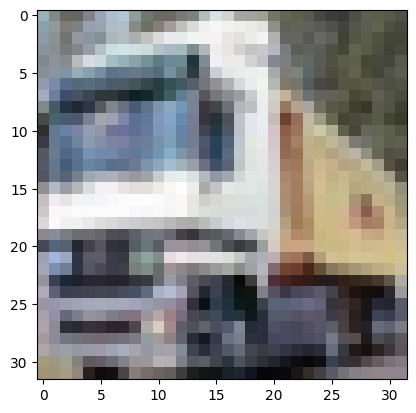

In [7]:
 plt.imshow(X_train[1])

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [32]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])


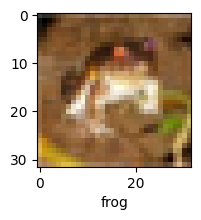

In [11]:
plot_sample(X_train,y_train,0)

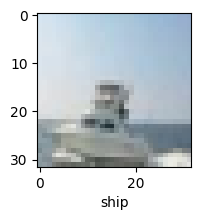

In [12]:
plot_sample(X_train,y_train,100)

In [13]:
 #normalizing the values
X_train=X_train/255
X_test=X_test/255

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')  # Use softmax for multi-class classification
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 76ms/step - accuracy: 0.3036 - loss: 1.9340
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.4214 - loss: 1.6429
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 79ms/step - accuracy: 0.4558 - loss: 1.5467
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.4717 - loss: 1.4894
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 93ms/step - accuracy: 0.4940 - loss: 1.4362


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.35      0.46      1000
           1       0.63      0.57      0.60      1000
           2       0.46      0.18      0.26      1000
           3       0.31      0.34      0.33      1000
           4       0.58      0.20      0.30      1000
           5       0.38      0.40      0.39      1000
           6       0.36      0.81      0.50      1000
           7       0.54      0.55      0.55      1000
           8       0.44      0.78      0.56      1000
           9       0.63      0.42      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3598 - loss: 1.7405
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5791 - loss: 1.1935
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.6353 - loss: 1.0368
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.6701 - loss: 0.9383
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6976 - loss: 0.8737
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 37ms/step - accuracy: 0.7144 - loss: 0.8234
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7282 - loss: 0.7841
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7404 - loss: 0.7418
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7509 - loss: 0.7153
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7650 - loss: 0.6775


In [20]:
cnn.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6968 - loss: 0.9242


[0.9298827052116394, 0.6953999996185303]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[9.6600008e-04, 1.7267691e-04, 2.0793315e-03, 7.6243979e-01,
        5.0133636e-04, 6.1835386e-02, 1.4307660e-01, 1.0694710e-04,
        2.8180653e-02, 6.4125174e-04],
       [1.1708491e-03, 3.1462393e-03, 1.7740168e-06, 1.4075221e-06,
        5.3708919e-07, 2.2312237e-07, 5.1332975e-08, 6.8178232e-09,
        9.9560052e-01, 7.8388155e-05],
       [7.7012189e-02, 1.9870490e-02, 1.0121560e-02, 1.1414393e-02,
        1.3089255e-02, 1.9408221e-03, 4.5353049e-04, 4.5974785e-03,
        8.5720932e-01, 4.2910711e-03],
       [8.6838782e-01, 4.8604808e-03, 1.1285044e-01, 4.0615114e-04,
        4.6317745e-03, 3.2219792e-05, 9.0397254e-04, 2.0737831e-05,
        7.7432040e-03, 1.6322506e-04],
       [1.7977645e-07, 1.7269907e-06, 2.2824736e-02, 6.3220942e-03,
        9.1038756e-03, 2.2274132e-04, 9.6149588e-01, 3.6595000e-06,
        2.4131428e-05, 8.2439516e-07]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [23]:
y_test[:5]


array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

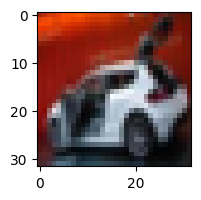

In [39]:
plot_sample(X_test, y_test,6)


In [41]:
classes[y_classes[6]]


'automobile'

In [42]:
classes[y_classes[6]]


'automobile'